# 4DN sci-Hi-C cell line clustering

## Notes

This tutorial uses the new API of Higashi (wrapping all functions of Higashi into the Higashi() class).
The old API of Higashi will still be supported and maintained).
Please check changelog for the current status of migration from the old API to the new API.

## Preparation

### Download input files
Download the demo data from the following link (4DN-sci-Hi-C Kim et al)
https://drive.google.com/drive/u/1/folders/1j7ffz96kv_Ft3hicu2DRBmfcje0RA1sc

The data is the same as the mtx files from https://noble.gs.washington.edu/proj/schic-topic-model/
The mtx files are concatenated and transformed into the Higashi input format.

Change the file path in the corresponding JSON file according to the location of the downloaded files.

### Install Higashi

1. install pytorch>=1.8.0 with cuda support when available.
2. `conda install -c ruochiz higashi`
(Although higashi would install pytorch when needed, there is no guarantee that it will install the correct version with cuda support. It is recommended to install pytorch separately before higashi.)

## Start running Higashi

### 1. Import package, set the path to the configuration JSON file.

In [4]:
from higashi.Higashi_wrapper import *
# Set the path to the configuration file, change it accordingly
config = "../config_dir/config_4DN_pub.JSON"

### 2. Process data for higashi model & prep the higashi model for training and imputation

In [6]:
# Initialize the Higashi instance
higashi_model = Higashi(config)

# Data processing (only needs to be run for once)
higashi.process_data()
higashi_model.prep_model()

setting to gpu:7
training on data from: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']
total_sparsity_cell 0.012761184803150997
no contractive loss
Node type num [16707   499   487   397   383   362   343   319   293   283   272   271
   268   231   215   206   181   163   157   119   127    97   103] [16707 17206 17693 18090 18473 18835 19178 19497 19790 20073 20345 20616
 20884 21115 21330 21536 21717 21880 22037 22156 22283 22380 22483]
start making attribute


  0%|          | 0/300 [00:00<?, ?it/s]

loss 0.8978922963142395 loss best 0.8527839779853821 epochs 104

initializing data generator


  0%|          | 0/22 [00:00<?, ?it/s]

initializing data generator


  0%|          | 0/22 [00:00<?, ?it/s]

### 3. First stage training for embeddings

In [7]:
# Stage 1 training
higashi_model.train_for_embeddings()

First stage training
[ Epoch 0 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.4409, mse:  1.3129,  acc: 84.093 %, pearson: 0.378, spearman: 0.313, elapse: 134.783 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.4081,  acc: 84.835 %,pearson: 0.499, spearman: 0.421,elapse: 0.267 s
update_rate: 1.014705	1.088508	update_rate: 0.000000	0.000000	pair_ratio: 0.1	
[ Epoch 1 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3717, mse:  1.3468,  acc: 86.998 %, pearson: 0.569, spearman: 0.477, elapse: 98.688 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3580,  acc: 88.130 %,pearson: 0.611, spearman: 0.500,elapse: 0.278 s
update_rate: 0.715208	15.391309	pair_ratio: 0.2	
[ Epoch 2 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3547, mse:  1.5188,  acc: 88.392 %, pearson: 0.619, spearman: 0.503, elapse: 98.162 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3528,  acc: 88.772 %,pearson: 0.644, spearman: 0.507,elapse: 0.273 s
update_rate: 0.224767	2.200308	pair_ratio: 0.3	
[ Epoch 3 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3462, mse:  1.1899,  acc: 89.147 %, pearson: 0.650, spearman: 0.514, elapse: 97.687 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3377,  acc: 89.547 %,pearson: 0.671, spearman: 0.527,elapse: 0.263 s
update_rate: 0.110246	0.457779	pair_ratio: 0.4	
[ Epoch 4 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3421, mse:  0.9911,  acc: 89.521 %, pearson: 0.663, spearman: 0.520, elapse: 95.539 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3455,  acc: 89.338 %,pearson: 0.639, spearman: 0.518,elapse: 0.389 s
update_rate: 0.058654	0.198261	pair_ratio: 0.5	
[ Epoch 5 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3406, mse:  0.9741,  acc: 89.660 %, pearson: 0.667, spearman: 0.522, elapse: 95.191 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3443,  acc: 89.436 %,pearson: 0.658, spearman: 0.516,elapse: 0.270 s
update_rate: 0.029441	0.180600	
[ Epoch 6 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3401, mse:  0.9724,  acc: 89.697 %, pearson: 0.671, spearman: 0.522, elapse: 106.801 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3441,  acc: 89.605 %,pearson: 0.683, spearman: 0.515,elapse: 0.279 s
update_rate: 0.015751	0.131197	
[ Epoch 7 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3384, mse:  0.9650,  acc: 89.788 %, pearson: 0.677, spearman: 0.524, elapse: 99.196 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3348,  acc: 89.754 %,pearson: 0.695, spearman: 0.529,elapse: 0.285 s
update_rate: 0.013218	0.139048	
[ Epoch 8 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3378, mse:  0.9628,  acc: 89.826 %, pearson: 0.682, spearman: 0.524, elapse: 97.853 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3356,  acc: 89.882 %,pearson: 0.685, spearman: 0.529,elapse: 0.286 s
update_rate: 0.005916	0.084229	
[ Epoch 9 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3363, mse:  0.9625,  acc: 89.893 %, pearson: 0.686, spearman: 0.526, elapse: 97.602 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3394,  acc: 89.715 %,pearson: 0.695, spearman: 0.524,elapse: 0.278 s
update_rate: 0.005900	0.103330	
[ Epoch 10 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3353, mse:  0.9602,  acc: 89.942 %, pearson: 0.690, spearman: 0.527, elapse: 96.672 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3299,  acc: 90.085 %,pearson: 0.693, spearman: 0.539,elapse: 0.326 s
update_rate: 0.004623	0.093469	
[ Epoch 11 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3343, mse:  0.9592,  acc: 89.975 %, pearson: 0.695, spearman: 0.528, elapse: 95.213 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3391,  acc: 89.863 %,pearson: 0.703, spearman: 0.523,elapse: 0.289 s
update_rate: 0.003104	0.070421	
[ Epoch 12 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3351, mse:  0.9595,  acc: 89.959 %, pearson: 0.701, spearman: 0.527, elapse: 95.941 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3331,  acc: 89.915 %,pearson: 0.688, spearman: 0.530,elapse: 0.260 s
update_rate: 0.003943	0.095415	
[ Epoch 13 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3347, mse:  0.9602,  acc: 89.976 %, pearson: 0.703, spearman: 0.527, elapse: 94.947 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3362,  acc: 89.837 %,pearson: 0.696, spearman: 0.526,elapse: 0.295 s
update_rate: 0.003393	0.073497	
[ Epoch 14 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3344, mse:  0.9605,  acc: 89.987 %, pearson: 0.704, spearman: 0.527, elapse: 94.769 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3483,  acc: 89.471 %,pearson: 0.711, spearman: 0.507,elapse: 0.292 s
update_rate: 0.002950	0.095878	
[ Epoch 15 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3335, mse:  0.9571,  acc: 90.035 %, pearson: 0.708, spearman: 0.528, elapse: 95.031 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3357,  acc: 89.811 %,pearson: 0.699, spearman: 0.528,elapse: 0.281 s
update_rate: 0.002305	0.105822	
[ Epoch 16 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3339, mse:  0.9578,  acc: 90.030 %, pearson: 0.710, spearman: 0.528, elapse: 95.036 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3355,  acc: 89.850 %,pearson: 0.723, spearman: 0.526,elapse: 0.260 s
update_rate: 0.002262	0.053522	
[ Epoch 17 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3333, mse:  0.9581,  acc: 90.036 %, pearson: 0.712, spearman: 0.528, elapse: 94.898 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3320,  acc: 89.996 %,pearson: 0.696, spearman: 0.531,elapse: 0.269 s
update_rate: 0.002234	0.066548	
[ Epoch 18 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3334, mse:  0.9580,  acc: 90.041 %, pearson: 0.709, spearman: 0.527, elapse: 94.115 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3422,  acc: 89.646 %,pearson: 0.688, spearman: 0.517,elapse: 0.262 s
update_rate: 0.001934	0.047479	
[ Epoch 19 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3324, mse:  0.9562,  acc: 90.082 %, pearson: 0.713, spearman: 0.529, elapse: 95.451 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3358,  acc: 90.067 %,pearson: 0.690, spearman: 0.524,elapse: 0.265 s
update_rate: 0.002309	0.079444	
[ Epoch 20 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3318, mse:  0.9558,  acc: 90.090 %, pearson: 0.713, spearman: 0.529, elapse: 95.824 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3340,  acc: 90.064 %,pearson: 0.698, spearman: 0.528,elapse: 0.275 s
update_rate: 0.002342	0.058354	
[ Epoch 21 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3325, mse:  0.9563,  acc: 90.070 %, pearson: 0.713, spearman: 0.528, elapse: 95.985 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3344,  acc: 89.848 %,pearson: 0.722, spearman: 0.529,elapse: 0.261 s
update_rate: 0.001843	0.048854	
[ Epoch 22 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3322, mse:  0.9552,  acc: 90.090 %, pearson: 0.718, spearman: 0.528, elapse: 95.440 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3300,  acc: 89.981 %,pearson: 0.710, spearman: 0.533,elapse: 0.258 s
update_rate: 0.002108	0.041794	
[ Epoch 23 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3306, mse:  0.9552,  acc: 90.139 %, pearson: 0.719, spearman: 0.530, elapse: 95.604 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3375,  acc: 89.904 %,pearson: 0.714, spearman: 0.524,elapse: 0.352 s
update_rate: 0.001511	0.043608	
[ Epoch 24 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3317, mse:  0.9549,  acc: 90.099 %, pearson: 0.716, spearman: 0.528, elapse: 96.319 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3326,  acc: 90.063 %,pearson: 0.776, spearman: 0.529,elapse: 0.285 s
update_rate: 0.001422	0.050740	
[ Epoch 25 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3319, mse:  0.9554,  acc: 90.094 %, pearson: 0.720, spearman: 0.528, elapse: 95.645 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3270,  acc: 90.243 %,pearson: 0.703, spearman: 0.537,elapse: 0.262 s
update_rate: 0.001566	0.040280	
[ Epoch 26 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3314, mse:  0.9547,  acc: 90.108 %, pearson: 0.719, spearman: 0.528, elapse: 94.883 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3396,  acc: 89.839 %,pearson: 0.684, spearman: 0.519,elapse: 0.253 s
update_rate: 0.001878	0.050545	
[ Epoch 27 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3321, mse:  0.9549,  acc: 90.095 %, pearson: 0.718, spearman: 0.527, elapse: 94.179 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3358,  acc: 89.798 %,pearson: 0.734, spearman: 0.523,elapse: 0.262 s
update_rate: 0.002032	0.053671	
[ Epoch 28 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3313, mse:  0.9553,  acc: 90.117 %, pearson: 0.719, spearman: 0.527, elapse: 96.451 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3259,  acc: 90.290 %,pearson: 0.740, spearman: 0.532,elapse: 0.264 s
update_rate: 0.001503	0.047548	
[ Epoch 29 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3309, mse:  0.9539,  acc: 90.122 %, pearson: 0.724, spearman: 0.527, elapse: 95.336 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3357,  acc: 89.956 %,pearson: 0.702, spearman: 0.523,elapse: 0.258 s
update_rate: 0.001739	0.038025	
[ Epoch 30 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3317, mse:  0.9540,  acc: 90.115 %, pearson: 0.721, spearman: 0.527, elapse: 95.617 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3318,  acc: 90.062 %,pearson: 0.701, spearman: 0.528,elapse: 0.258 s
update_rate: 0.001558	0.035019	
[ Epoch 31 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3306, mse:  0.9539,  acc: 90.132 %, pearson: 0.721, spearman: 0.528, elapse: 95.573 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3393,  acc: 89.936 %,pearson: 0.721, spearman: 0.521,elapse: 0.267 s
update_rate: 0.001228	0.036437	
[ Epoch 32 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3302, mse:  0.9548,  acc: 90.161 %, pearson: 0.725, spearman: 0.529, elapse: 95.482 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3348,  acc: 89.895 %,pearson: 0.704, spearman: 0.524,elapse: 0.262 s
update_rate: 0.001097	0.075734	
[ Epoch 33 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3313, mse:  0.9543,  acc: 90.109 %, pearson: 0.720, spearman: 0.527, elapse: 95.912 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3220,  acc: 90.491 %,pearson: 0.764, spearman: 0.532,elapse: 0.264 s
update_rate: 0.001912	0.044737	
[ Epoch 34 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3304, mse:  0.9533,  acc: 90.126 %, pearson: 0.720, spearman: 0.527, elapse: 95.296 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3260,  acc: 90.268 %,pearson: 0.771, spearman: 0.534,elapse: 0.262 s
update_rate: 0.001381	0.030251	
[ Epoch 35 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3308, mse:  0.9534,  acc: 90.131 %, pearson: 0.721, spearman: 0.527, elapse: 95.609 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3289,  acc: 90.159 %,pearson: 0.723, spearman: 0.532,elapse: 0.283 s
update_rate: 0.001156	0.040907	
[ Epoch 36 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3298, mse:  0.9531,  acc: 90.160 %, pearson: 0.724, spearman: 0.528, elapse: 95.597 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3346,  acc: 90.060 %,pearson: 0.709, spearman: 0.525,elapse: 0.258 s
update_rate: 0.001236	0.029799	
[ Epoch 37 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3305, mse:  0.9537,  acc: 90.128 %, pearson: 0.725, spearman: 0.527, elapse: 96.150 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3426,  acc: 89.698 %,pearson: 0.685, spearman: 0.512,elapse: 0.266 s
update_rate: 0.001071	0.037289	
[ Epoch 38 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3303, mse:  0.9551,  acc: 90.119 %, pearson: 0.723, spearman: 0.527, elapse: 95.697 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3312,  acc: 90.104 %,pearson: 0.752, spearman: 0.528,elapse: 0.266 s
update_rate: 0.001176	0.042577	
[ Epoch 39 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3307, mse:  0.9534,  acc: 90.134 %, pearson: 0.722, spearman: 0.527, elapse: 95.803 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3314,  acc: 90.082 %,pearson: 0.729, spearman: 0.525,elapse: 0.266 s
update_rate: 0.001352	0.039690	
[ Epoch 40 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3300, mse:  0.9540,  acc: 90.151 %, pearson: 0.724, spearman: 0.527, elapse: 96.547 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3343,  acc: 89.996 %,pearson: 0.695, spearman: 0.525,elapse: 0.261 s
update_rate: 0.000931	0.029032	
[ Epoch 41 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3296, mse:  0.9530,  acc: 90.128 %, pearson: 0.726, spearman: 0.527, elapse: 96.028 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3339,  acc: 89.935 %,pearson: 0.738, spearman: 0.524,elapse: 0.257 s
update_rate: 0.001002	0.035812	
[ Epoch 42 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3294, mse:  0.9534,  acc: 90.162 %, pearson: 0.724, spearman: 0.527, elapse: 96.579 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3404,  acc: 89.713 %,pearson: 0.734, spearman: 0.515,elapse: 0.266 s
update_rate: 0.001158	0.029915	
[ Epoch 43 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3294, mse:  0.9530,  acc: 90.153 %, pearson: 0.725, spearman: 0.527, elapse: 95.282 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3323,  acc: 89.940 %,pearson: 0.724, spearman: 0.524,elapse: 0.259 s
update_rate: 0.000813	0.022173	
[ Epoch 44 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3305, mse:  0.9531,  acc: 90.126 %, pearson: 0.724, spearman: 0.526, elapse: 94.964 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3383,  acc: 89.832 %,pearson: 0.694, spearman: 0.518,elapse: 0.264 s
update_rate: 0.000904	0.034675	
[ Epoch 45 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3293, mse:  0.9530,  acc: 90.186 %, pearson: 0.727, spearman: 0.528, elapse: 95.455 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3270,  acc: 90.181 %,pearson: 0.698, spearman: 0.527,elapse: 0.263 s
update_rate: 0.001007	0.029063	
[ Epoch 46 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3294, mse:  0.9529,  acc: 90.134 %, pearson: 0.726, spearman: 0.527, elapse: 94.601 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3270,  acc: 90.212 %,pearson: 0.748, spearman: 0.530,elapse: 0.263 s
update_rate: 0.001264	0.024716	
[ Epoch 47 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3293, mse:  0.9535,  acc: 90.144 %, pearson: 0.725, spearman: 0.527, elapse: 95.505 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3332,  acc: 89.834 %,pearson: 0.713, spearman: 0.519,elapse: 0.283 s
update_rate: 0.000960	0.032862	
[ Epoch 48 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3300, mse:  0.9550,  acc: 90.140 %, pearson: 0.726, spearman: 0.527, elapse: 95.268 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3343,  acc: 90.013 %,pearson: 0.709, spearman: 0.520,elapse: 0.311 s
update_rate: 0.000971	0.022034	
[ Epoch 49 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3292, mse:  0.9542,  acc: 90.140 %, pearson: 0.727, spearman: 0.526, elapse: 95.335 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3207,  acc: 90.352 %,pearson: 0.708, spearman: 0.533,elapse: 0.259 s
update_rate: 0.000920	0.025450	
[ Epoch 50 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3294, mse:  0.9534,  acc: 90.144 %, pearson: 0.724, spearman: 0.526, elapse: 95.170 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3295,  acc: 90.127 %,pearson: 0.725, spearman: 0.522,elapse: 0.285 s
update_rate: 0.000827	0.028155	
[ Epoch 51 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3288, mse:  0.9537,  acc: 90.152 %, pearson: 0.729, spearman: 0.526, elapse: 95.095 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3301,  acc: 90.094 %,pearson: 0.695, spearman: 0.525,elapse: 0.256 s
update_rate: 0.000751	0.026960	
[ Epoch 52 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3290, mse:  0.9532,  acc: 90.164 %, pearson: 0.725, spearman: 0.527, elapse: 95.888 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3240,  acc: 90.160 %,pearson: 0.707, spearman: 0.530,elapse: 0.260 s
update_rate: 0.000972	0.035934	
[ Epoch 53 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3283, mse:  0.9532,  acc: 90.168 %, pearson: 0.730, spearman: 0.528, elapse: 95.325 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3371,  acc: 89.949 %,pearson: 0.696, spearman: 0.520,elapse: 0.264 s
update_rate: 0.000991	0.019240	
[ Epoch 54 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3290, mse:  0.9539,  acc: 90.172 %, pearson: 0.726, spearman: 0.528, elapse: 95.742 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3313,  acc: 90.144 %,pearson: 0.777, spearman: 0.523,elapse: 0.259 s
update_rate: 0.000882	0.023413	
[ Epoch 55 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3281, mse:  0.9536,  acc: 90.201 %, pearson: 0.727, spearman: 0.528, elapse: 95.235 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3366,  acc: 89.887 %,pearson: 0.721, spearman: 0.521,elapse: 0.263 s
update_rate: 0.000881	0.030947	
[ Epoch 56 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3291, mse:  0.9534,  acc: 90.150 %, pearson: 0.731, spearman: 0.526, elapse: 95.181 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3298,  acc: 89.882 %,pearson: 0.698, spearman: 0.521,elapse: 0.264 s
update_rate: 0.000933	0.024978	
[ Epoch 57 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3282, mse:  0.9527,  acc: 90.183 %, pearson: 0.729, spearman: 0.528, elapse: 95.767 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3333,  acc: 89.829 %,pearson: 0.721, spearman: 0.521,elapse: 0.261 s
update_rate: 0.001179	0.019270	
[ Epoch 58 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3285, mse:  0.9617,  acc: 90.184 %, pearson: 0.730, spearman: 0.527, elapse: 95.669 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3393,  acc: 89.670 %,pearson: 0.732, spearman: 0.515,elapse: 0.259 s
update_rate: 0.000898	0.026274	
[ Epoch 59 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3291, mse:  0.9543,  acc: 90.142 %, pearson: 0.724, spearman: 0.526, elapse: 95.101 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3280,  acc: 90.018 %,pearson: 0.725, spearman: 0.524,elapse: 0.265 s
update_rate: 0.001075	0.022606	
[ Epoch 60 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3284, mse:  0.9721,  acc: 90.170 %, pearson: 0.731, spearman: 0.527, elapse: 95.249 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3335,  acc: 90.048 %,pearson: 0.735, spearman: 0.522,elapse: 0.264 s
update_rate: 0.000799	0.032418	
[ Epoch 61 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3289, mse:  0.9537,  acc: 90.143 %, pearson: 0.726, spearman: 0.526, elapse: 95.477 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3297,  acc: 90.005 %,pearson: 0.719, spearman: 0.524,elapse: 0.270 s
update_rate: 0.000855	0.014153	
[ Epoch 62 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3285, mse:  0.9549,  acc: 90.153 %, pearson: 0.728, spearman: 0.526, elapse: 95.898 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3334,  acc: 90.005 %,pearson: 0.709, spearman: 0.520,elapse: 0.286 s
update_rate: 0.000924	0.018809	
[ Epoch 63 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3273, mse:  0.9544,  acc: 90.199 %, pearson: 0.730, spearman: 0.527, elapse: 95.843 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3323,  acc: 89.913 %,pearson: 0.714, spearman: 0.522,elapse: 0.285 s
update_rate: 0.000732	0.017411	
[ Epoch 64 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3291, mse:  0.9535,  acc: 90.143 %, pearson: 0.723, spearman: 0.526, elapse: 95.758 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3404,  acc: 89.915 %,pearson: 0.700, spearman: 0.515,elapse: 0.264 s
update_rate: 0.000978	0.018692	
[ Epoch 65 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3284, mse:  0.9542,  acc: 90.173 %, pearson: 0.731, spearman: 0.526, elapse: 95.545 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3253,  acc: 90.125 %,pearson: 0.753, spearman: 0.525,elapse: 0.255 s
update_rate: 0.000954	0.016010	
[ Epoch 66 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3269, mse:  0.9537,  acc: 90.174 %, pearson: 0.731, spearman: 0.527, elapse: 95.713 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3331,  acc: 89.800 %,pearson: 0.709, spearman: 0.520,elapse: 0.257 s
update_rate: 0.000898	0.018034	
[ Epoch 67 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3291, mse:  0.9548,  acc: 90.144 %, pearson: 0.730, spearman: 0.526, elapse: 95.598 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3401,  acc: 89.846 %,pearson: 0.725, spearman: 0.515,elapse: 0.264 s
update_rate: 0.000854	0.017203	
[ Epoch 68 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3273, mse:  0.9538,  acc: 90.181 %, pearson: 0.730, spearman: 0.527, elapse: 94.893 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3276,  acc: 89.924 %,pearson: 0.718, spearman: 0.515,elapse: 0.258 s
update_rate: 0.000967	0.022233	
[ Epoch 69 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3284, mse:  0.9551,  acc: 90.148 %, pearson: 0.731, spearman: 0.526, elapse: 94.840 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3361,  acc: 89.771 %,pearson: 0.690, spearman: 0.515,elapse: 0.265 s
update_rate: 0.000635	0.022671	
[ Epoch 70 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3279, mse:  0.9577,  acc: 90.176 %, pearson: 0.730, spearman: 0.526, elapse: 95.017 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3286,  acc: 90.104 %,pearson: 0.729, spearman: 0.522,elapse: 0.264 s
update_rate: 0.000745	0.021528	
[ Epoch 71 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3282, mse:  0.9826,  acc: 90.144 %, pearson: 0.730, spearman: 0.525, elapse: 95.398 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3247,  acc: 90.200 %,pearson: 0.729, spearman: 0.527,elapse: 0.281 s
update_rate: 0.000656	0.020937	
[ Epoch 72 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3275, mse:  0.9597,  acc: 90.177 %, pearson: 0.729, spearman: 0.526, elapse: 94.920 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3358,  acc: 89.922 %,pearson: 0.730, spearman: 0.519,elapse: 0.306 s
update_rate: 0.000799	0.025072	
[ Epoch 73 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3275, mse:  0.9539,  acc: 90.169 %, pearson: 0.724, spearman: 0.525, elapse: 95.158 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3324,  acc: 90.149 %,pearson: 0.703, spearman: 0.524,elapse: 0.285 s
update_rate: 0.000830	0.020632	
[ Epoch 74 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3284, mse:  0.9544,  acc: 90.119 %, pearson: 0.729, spearman: 0.525, elapse: 94.835 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3296,  acc: 89.855 %,pearson: 0.720, spearman: 0.519,elapse: 0.258 s
update_rate: 0.000570	0.018636	
[ Epoch 75 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3272, mse:  0.9556,  acc: 90.178 %, pearson: 0.729, spearman: 0.526, elapse: 96.062 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3339,  acc: 89.947 %,pearson: 0.718, spearman: 0.522,elapse: 0.268 s
update_rate: 0.000706	0.017171	
[ Epoch 76 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3280, mse:  0.9563,  acc: 90.153 %, pearson: 0.731, spearman: 0.526, elapse: 96.144 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3297,  acc: 90.083 %,pearson: 0.727, spearman: 0.527,elapse: 0.259 s
update_rate: 0.000698	0.020558	
[ Epoch 77 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3286, mse:  0.9547,  acc: 90.130 %, pearson: 0.727, spearman: 0.525, elapse: 95.542 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3331,  acc: 90.057 %,pearson: 0.730, spearman: 0.521,elapse: 0.266 s
update_rate: 0.000963	0.021044	
[ Epoch 78 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3281, mse:  0.9561,  acc: 90.149 %, pearson: 0.731, spearman: 0.525, elapse: 94.772 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3245,  acc: 90.156 %,pearson: 0.710, spearman: 0.525,elapse: 0.256 s
update_rate: 0.000813	0.014690	
[ Epoch 79 of 80 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3273, mse:  1.0023,  acc: 90.151 %, pearson: 0.732, spearman: 0.525, elapse: 95.475 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3357,  acc: 90.002 %,pearson: 0.715, spearman: 0.520,elapse: 0.258 s
update_rate: 0.000961	0.017665	


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

  - (Validation-hyper) bce:  0.4107,  acc: 83.215 %, auc: 0.572, aupr: 0.422,elapse: 2.350 s


### 4. Visualize embedding results

(16707, 128)


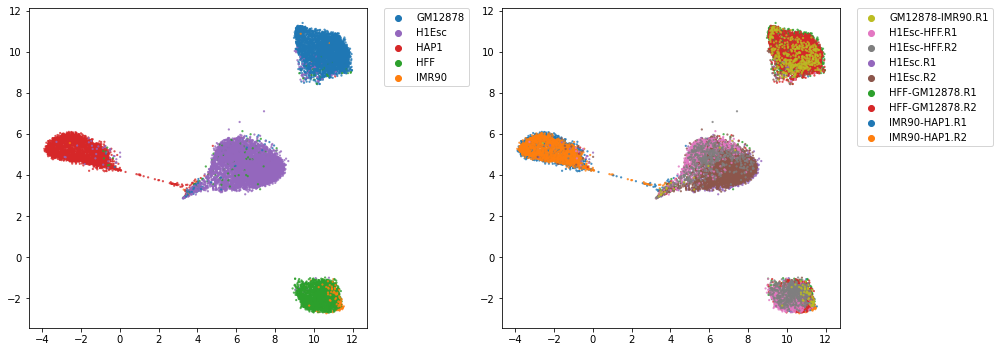

In [20]:
# Visualize embedding results
cell_embeddings = higashi_model.fetch_cell_embeddings()
print (cell_embeddings.shape)

from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

vec = UMAP(n_components=2, n_neighbors=25, random_state=0).fit_transform(cell_embeddings)
cell_type = higashi_model.label_info['cell type']
batch = higashi_model.label_info['batch']
fig = plt.figure(figsize=(14, 5))
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0, hue_order=['GM12878','IMR90','HFF', 'HAP1', 'H1Esc'])
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
ax = plt.subplot(1, 2, 2)
sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
plt.tight_layout()
plt.show()



The tutorial of scHiCluster on this dataset can be found here: https://github.com/zhoujt1994/scHiCluster/tree/master/example/4DN